# <p style="text-align: center;"> Análise de dados da frota de táxis de Porto Alegre/RS </p>

<img src="files/img/Picture.jpg" width="400"/>
<p style="text-align: center;"> Foto: Eduardo Paganella / Agencia RBS</p>

Este notebook faz a importação de dados relativos à frota de táxis direto do site da Prefeitura de Porto Alegre, manipula os dados através da engenharia de recuros e realiza uma breve análise exploratória.

## Importando bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
%matplotlib inline

## Importando dados atualizados do site da prefeitura

In [2]:
url = 'https://dadosabertos.poa.br/dataset/9919770d-c0ac-47d2-84d0-c0061b2937c4/resource/f156879a-6921-44e9-99af-964d30367077/download/frota_taxi.csv'
taxi = pd.read_csv(url, sep=';')

## Checando tabela inicial

In [59]:
taxi.head()

,data_extracao,prefixo,ponto,placa,marca,modelo,data_primeiro_emplac,ano_fabricacao,combustivel,álcool,gasolina,GNV,elétrico
0,2020-03-12 01:58:27.228285,3247,HOSPITAL PRONTO SOCORRO (HPS),IYO1026,VW,VOYAGE,2018-05-28,2018,ÁLCOOL/GASOLINA/GNV,1,1,1,0
1,2020-03-12 01:58:27.228285,3655,SHOPPING CENTER IGUATEMI II,IYX1491,TOYOTA,ETIOS SEDAN,2018-11-14,2018,ÁLCOOL/GASOLINA,1,1,0,0
2,2020-03-12 01:58:27.228285,4339,HOTEL LANCASTER,ITI0860,CHEVROLET,COBALT,2012-07-20,2012,ÁLCOOL/GASOLINA/GNV,1,1,1,0
3,2020-03-12 01:58:27.228285,3748,NaN,IXQ7200,TOYOTA,ETIOS SEDAN,2017-01-13,2016,ÁLCOOL/GASOLINA,1,1,0,0
4,2020-03-12 01:58:27.228285,3108,NaN,IWQ2948,VW,VOYAGE,2015-07-02,2015,ÁLCOOL/GASOLINA/GNV,1,1,1,0


## Engenharia de recursos inicial

A engenharia de recursos é necessária pois a coluna de combustível não está padronizada. Também é importante criar um dataframe para cada combustível, eles serão usados na visualização de dados. O arquivo com o dataframe principal será salvo como CSV contendo a data da extração.

Esta etapa pode levar até 20 minutos.

In [18]:
##########################################
# Corrige as discrepâncias na coluna dos combustíveis
##########################################

taxi["combustivel"].replace({"ALCOOL/GASOLINA": "ÁLCOOL/GASOLINA", # Acento
                            'ALCOOL/GASOLINA/ELÉTRICO': 'ÁLCOOL/GASOLINA/ELÉTRICO', # Acento
                            'ÁLCOOL-GASOLINA': 'ÁLCOOL/GASOLINA', # Hífen por barra
                            'GNV-ÁLCOOL-GASOLINA': 'ÁLCOOL/GASOLINA/GNV', # Hífen por barra
                            'GNV-GASOLINA': 'GASOLINA/GNV', # Hífen por barra
                            'GNV-ÁLCOOL': 'ÁLCOOL/GNV'}, # Hífen por barra
                            inplace=True)

##########################################
# Cria colunas dummy para os tipos de combustível
##########################################
taxi['álcool'] = 0
for x in tqdm(range(0, len(taxi))):
    if taxi['combustivel'].loc[x].find('ÁLCOOL') != -1:
        taxi['álcool'][x] = 1
        print('Álcool pronto')
        
taxi['gasolina'] = 0
for x in tqdm(range(0, len(taxi))):
    if taxi['combustivel'].loc[x].find('GASOLINA') != -1:
        taxi['gasolina'][x] = 1
        print('Gasolina pronto')
        
taxi['GNV'] = 0
for x in tqdm(range(0, len(taxi))):
    if taxi['combustivel'].loc[x].find('GNV') != -1:
        taxi['GNV'][x] = 1
        print('GNV pronto')
        
taxi['elétrico'] = 0
for x in tqdm(range(0, len(taxi))):
    if taxi['combustivel'].loc[x].find('ELÉTRICO') != -1:
        taxi['elétrico'][x] = 1
        print('Elétrico pronto')

##########################################
# Cria dataframes para os combustíveis (serão usados mais adiante)
##########################################
taxi_gasolina = taxi[taxi['gasolina'] == 1]
taxi_alcool = taxi[taxi['álcool'] == 1]
taxi_gnv = taxi[taxi['GNV'] == 1]

##########################################
# Cria uma variável com a data de extração
##########################################
date = pd.to_datetime(taxi['data_extracao'].unique())
dia = "{:02d}".format(date.day[0])
mes = "{:02d}".format(date.month[0])
ano = date.year[0]
data_extracao = '.'.join([str(dia), str(mes), str(ano)])

# Salvando dataframe como CSV
taxi.to_csv(''.join(['taxi', '_', data_extracao, '.csv']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Caso o arquivo já esteja baixado e manipulado:

In [ ]:
taxi = pd.read_csv('taxi_12.03.2020.csv', index_col=0)

# Análise de dados exploratória

Iniciamos a análise de dados exploratória com as funções describe(), info() e head(). Há apenas dados faltando na coluna 'ponto', que indica se o táxi possui ou não ponto fixo.

In [19]:
taxi.describe()

,prefixo,ano_fabricacao,álcool,gasolina,GNV,elétrico
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,3015.018221,2015.455534,0.997824,0.998096,0.646451,0.000544
std,1178.171015,2.790859,0.046600,0.043596,0.478136,0.023319
min,1002.000000,1992.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,2014.000000,1.000000,1.000000,0.000000,0.000000
50%,2994.000000,2016.000000,1.000000,1.000000,1.000000,0.000000
75%,4033.000000,2018.000000,1.000000,1.000000,1.000000,0.000000
max,5094.000000,2020.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 13 columns):
data_extracao           3677 non-null object
prefixo                 3677 non-null int64
ponto                   2520 non-null object
placa                   3677 non-null object
marca                   3677 non-null object
modelo                  3677 non-null object
data_primeiro_emplac    3677 non-null object
ano_fabricacao          3677 non-null int64
combustivel             3677 non-null object
álcool                  3677 non-null int64
gasolina                3677 non-null int64
GNV                     3677 non-null int64
elétrico                3677 non-null int64
dtypes: int64(6), object(7)
memory usage: 373.5+ KB


In [21]:
taxi.head()

,data_extracao,prefixo,ponto,placa,marca,modelo,data_primeiro_emplac,ano_fabricacao,combustivel,álcool,gasolina,GNV,elétrico
0,2020-03-12 01:58:27.228285,3247,HOSPITAL PRONTO SOCORRO (HPS),IYO1026,VW,VOYAGE,2018-05-28,2018,ÁLCOOL/GASOLINA/GNV,1,1,1,0
1,2020-03-12 01:58:27.228285,3655,SHOPPING CENTER IGUATEMI II,IYX1491,TOYOTA,ETIOS SEDAN,2018-11-14,2018,ÁLCOOL/GASOLINA,1,1,0,0
2,2020-03-12 01:58:27.228285,4339,HOTEL LANCASTER,ITI0860,CHEVROLET,COBALT,2012-07-20,2012,ÁLCOOL/GASOLINA/GNV,1,1,1,0
3,2020-03-12 01:58:27.228285,3748,NaN,IXQ7200,TOYOTA,ETIOS SEDAN,2017-01-13,2016,ÁLCOOL/GASOLINA,1,1,0,0
4,2020-03-12 01:58:27.228285,3108,NaN,IWQ2948,VW,VOYAGE,2015-07-02,2015,ÁLCOOL/GASOLINA/GNV,1,1,1,0


## Marcas

Primeiro consultamos as principais marcas de carros e armazenamos as mais frequentes.

In [22]:
marca1 = taxi['marca'].value_counts().index[0]
marca2 = taxi['marca'].value_counts().index[1]
marca3 = taxi['marca'].value_counts().index[2]
taxi['marca'].value_counts()

CHEVROLET    1125
VW            910
FIAT          892
TOYOTA        497
NISSAN        113
GM             79
RENAULT        34
FORD           23
HONDA           2
CHERY           1
HYUNDAI         1
Name: marca, dtype: int64

 Então, geramos o gráfico de contagem com as principais marcas de carros.

Text(0.5, 1.0, 'CHEVROLET VW e FIAT são as marcas mais comuns - 12.03.2020')

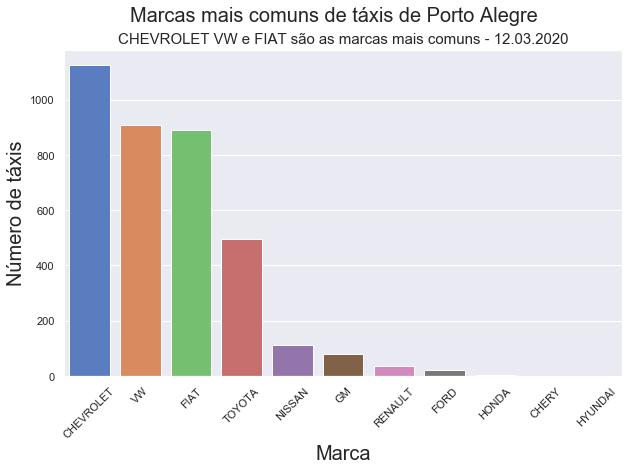

In [98]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(x='marca',data=taxi,
              order = taxi['marca'].value_counts().index, palette='muted')
plt.xticks(rotation=45)
plt.xlabel('Marca', size=20)
plt.ylabel('Número de táxis', size=20)
plt.suptitle('Marcas mais comuns de táxis de Porto Alegre', size=20, horizontalalignment='center')
plt.title(' '.join([marca1, marca2, 'e', marca3, 'são as marcas mais comuns -', data_extracao]) , size=15)

## Principais modelos de carros usados por taxistas

De maneira similar às marcas, primeiro consultamos os principais modelos de carros e armazenamos os mais frequentes.

In [27]:
modelo1 = taxi['modelo'].value_counts().index[0]
modelo2 = taxi['modelo'].value_counts().index[1]
modelo3 = taxi['modelo'].value_counts().index[2]
taxi['modelo'].value_counts().head(20)

SIENA            818
VOYAGE           778
SPIN             423
ETIOS SEDAN      365
COBALT           249
CLASSIC          241
PRISMA           235
VERSA            105
ETIOS             90
VIRTUS            67
PARATI            39
LOGAN             32
COROLLA           26
MERIVA            20
UNO               17
KA SEDAN          16
PALIO             15
PALIO WEEKEND     13
CORSA SEDAN       13
CRONOS            12
Name: modelo, dtype: int64

Text(0.5, 1.0, 'SIENA VOYAGE e SPIN são os modelos mais comuns - 12.03.2020')

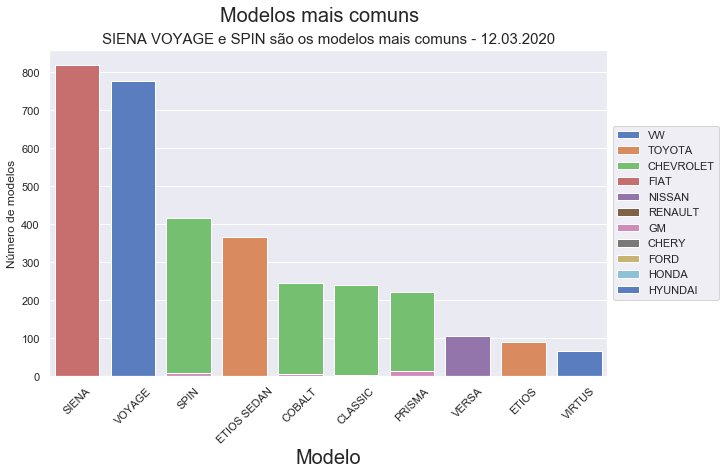

In [99]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(x='modelo',data=taxi,
              order = taxi['modelo'].value_counts().head(10).index, hue='marca', dodge=False, palette='muted')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.xlabel('Modelo', size=20)
plt.ylabel('Número de modelos')
plt.suptitle('Modelos mais comuns', size=20, horizontalalignment='center')
plt.title('Siena e Voyage são os mais comuns de táxis de Porto Alegre')
plt.title(' '.join([modelo1, modelo2, 'e', modelo3, 'são os modelos mais comuns -', data_extracao]) , size=15)

## Principais anos de fabricação dos táxis

Agora faremos a análise do anos de fabricação mais frequentes.

In [30]:
taxi['ano_fabricacao'].value_counts().head(10)

2015    577
2019    530
2016    504
2018    436
2014    417
2017    416
2013    303
2012    191
2011    124
2010     68
Name: ano_fabricacao, dtype: int64

In [31]:
ano_mais_frequente = str(taxi['ano_fabricacao'].value_counts().index[0])

Text(0.5, 1.0, '2015 é o ano de fabricação mais comum - 12.03.2020')

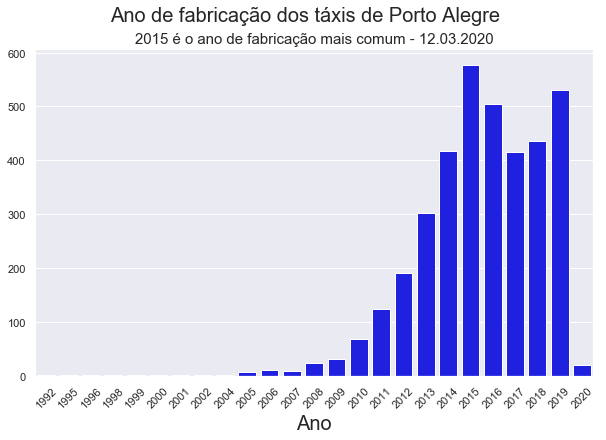

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='ano_fabricacao',data=taxi, color='blue')
plt.xticks(rotation=45)
plt.ylabel('', size=20)
plt.xlabel('Ano', size=20)
plt.suptitle('Ano de fabricação dos táxis de Porto Alegre', size=20)
plt.title(' '.join([ano_mais_frequente,'é o ano de fabricação mais comum -', data_extracao]), size=15, horizontalalignment='center')

## Combustível

Geramos os dados relativos de combustíveis e depois criamos um dataframe com as proporções. Gasolina e álcool são os combustíveis predominantes, mas o GNV também é bastante frequente.

In [46]:
taxi['combustivel'].value_counts()

ÁLCOOL/GASOLINA/GNV         2366
ÁLCOOL/GASOLINA             1294
GASOLINA/GNV                   6
ÁLCOOL/GNV                     5
ÁLCOOL                         2
GASOLINA                       2
ÁLCOOL/GASOLINA/ELÉTRICO       2
Name: combustivel, dtype: int64

In [47]:
alcool_porcento = '{:.2%}'.format(taxi[taxi['álcool'] == 1]['álcool'].sum()/len(taxi['álcool']))
GNV_porcento = '{:.2%}'.format(taxi[taxi['GNV'] == 1]['GNV'].sum()/len(taxi['GNV']))
gasolina_porcento = '{:.2%}'.format(taxi[taxi['gasolina'] == 1]['gasolina'].sum()/len(taxi['gasolina']))
elétrico_porcento = '{:.2%}'.format(taxi[taxi['elétrico'] == 1]['elétrico'].sum()/len(taxi['elétrico']))

In [48]:
combustivel_porcento = pd.DataFrame(data=[gasolina_porcento, alcool_porcento, GNV_porcento, elétrico_porcento], index=['Gasolina', 'Álcool', 'GNV', 'Elétrico'], columns=['Combustível'])
combustivel_porcento

,Combustível
Gasolina,99.81%
Álcool,99.78%
GNV,64.65%
Elétrico,0.05%


Há uma pequena frota de táxis elétricos em Porto Alege/RS

In [49]:
taxi[taxi['elétrico'] == 1]

,data_extracao,prefixo,ponto,placa,marca,modelo,data_primeiro_emplac,ano_fabricacao,combustivel,álcool,gasolina,GNV,elétrico
1866,2020-03-12 01:58:27.228285,2648,NaN,IZT7D00,TOYOTA,COROLLA HYBRID,2019-11-27,2019,ÁLCOOL/GASOLINA/ELÉTRICO,1,1,0,1
3452,2020-03-12 01:58:27.228285,4950,RODOVIÁRIA,IZU2G20,TOYOTA,COROLLA,2019-11-28,2019,ÁLCOOL/GASOLINA/ELÉTRICO,1,1,0,1


## Mapa de calor dos anos de fabricação

Nesta última seção, são criados mapas de calor contendo os modelos, marcas e anos de fabricação dos táxis de Porto Alegre. Assim, é possível observar as tendências da frota de táxis da cidade.

Text(0.5, 1.0, 'Marca')

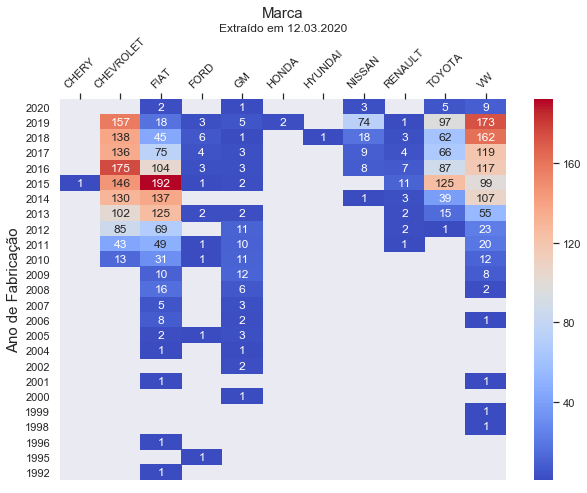

In [97]:
pvtaxi = taxi[['ano_fabricacao', 'marca']].pivot_table(index='ano_fabricacao',columns='marca', aggfunc=len)
heat = pvtaxi.sort_index(ascending=False)
plt.figure(figsize=(10,7))
ax = sns.heatmap(heat, cmap='coolwarm', annot=True, fmt='g')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
plt.xticks(rotation=45)
plt.xlabel(''.join(['Extraído em ', data_extracao]), size=12)
plt.ylabel('Ano de Fabricação', size=15)
plt.title('Marca', size=15)

O heatmap abaixo é grande demais para ser visto num Notebook, o ideal é conferir a imagem que é exportada.

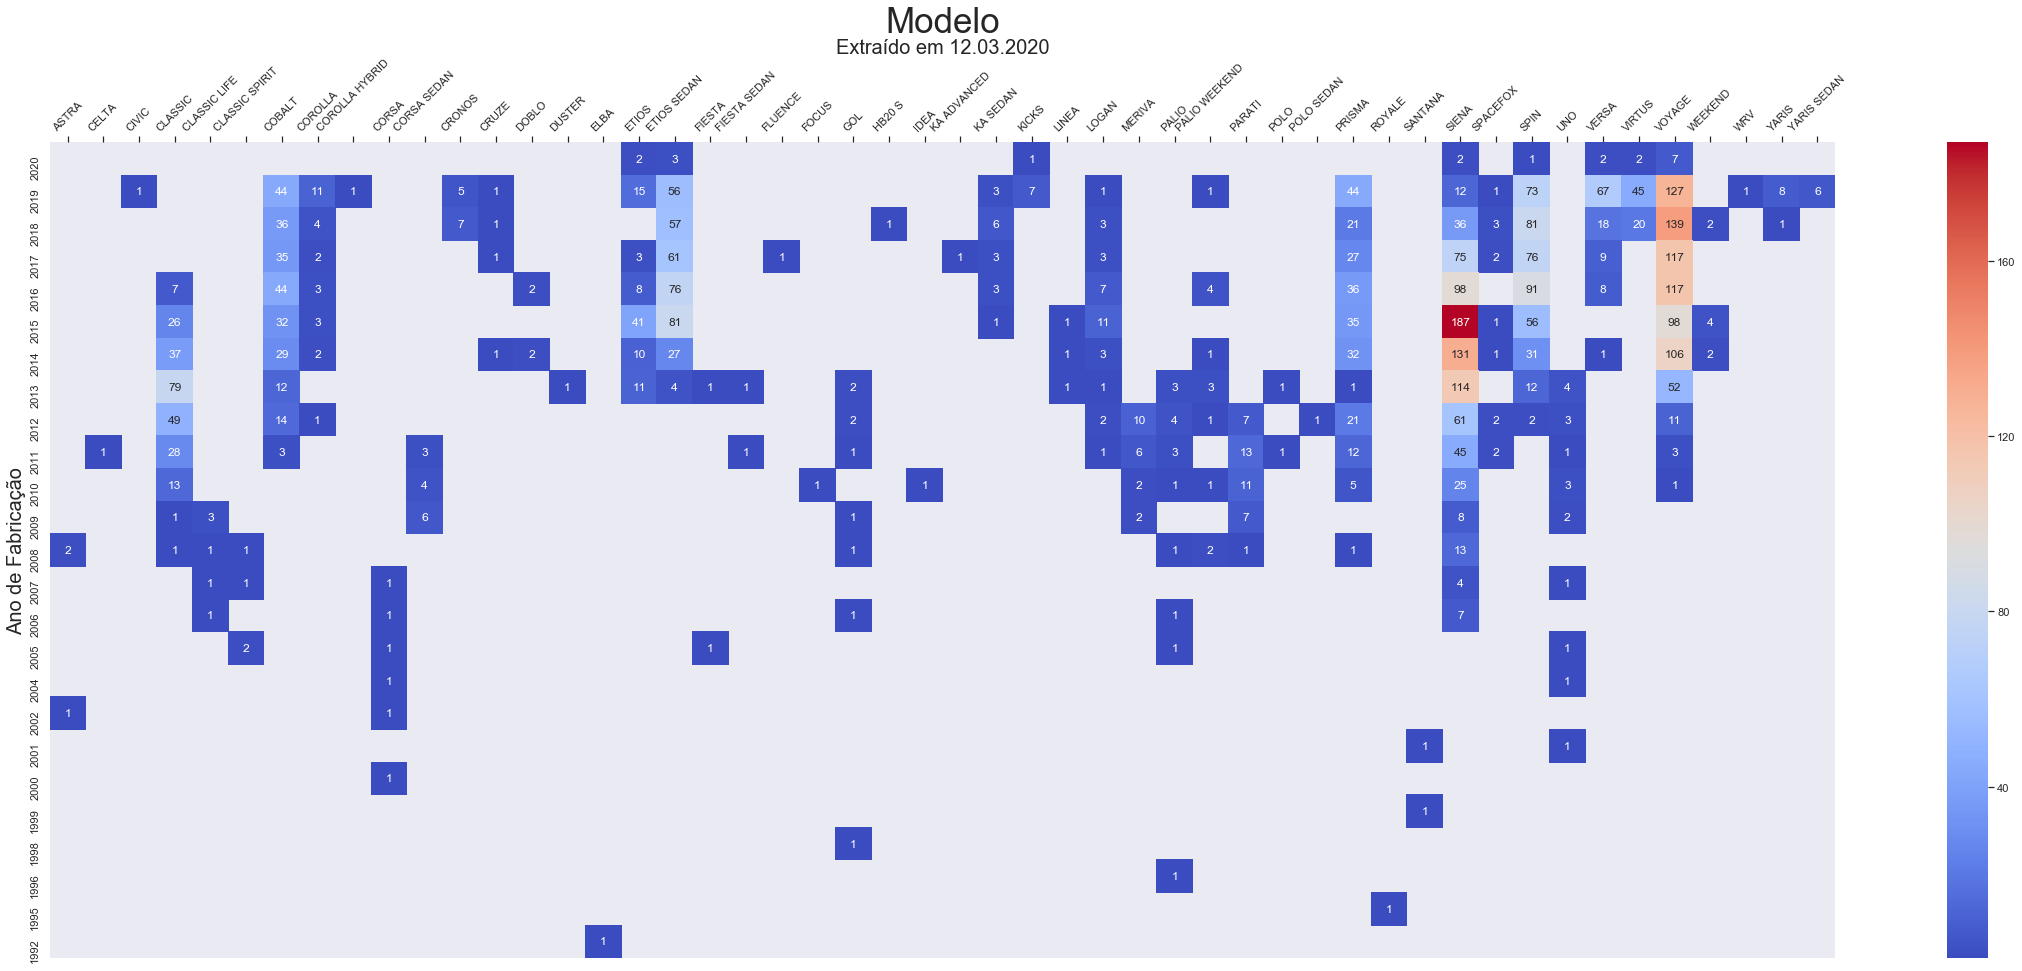

In [94]:
pvtaxi = taxi[['ano_fabricacao', 'modelo']].pivot_table(index='ano_fabricacao',columns='modelo', aggfunc=len)
heat = pvtaxi.sort_index(ascending=False)
plt.figure(figsize=(40,15))
ax = sns.heatmap(heat, cmap='coolwarm', annot=True, fmt='g')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
plt.xlabel(''.join(['Extraído em ', data_extracao]), size=20)
plt.ylabel('Ano de Fabricação', size=20)
plt.xticks(rotation=45)
plt.title('Modelo', size=35)
figure = ax.get_figure()    
figure.savefig('heatmap.png', dpi=200)